In [2]:
# Lending Club Case Study - November 2022 Assignment
# Here we are passing the loan.csv file to pandas dataframe inp0 and checking that its passed correctly byb peinting the few head values
import pandas as pd, numpy as np
import statistics  # to find mode value
inp0 = pd.read_csv("loan.csv")
inp0.head()

C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\3364443076.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0 = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# taking a look at the columns in the loan.csv
inp0.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
# checking for the number of rows and columns in loan.csv
inp0.shape

(39717, 111)

In [5]:
# taking a quick check on information
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
# Data Cleaning function creation #
# following function created to identify the %age of null values contained in each variable/column of loan.csv #
# this helps us in identifying the number of columns which has around 90% of null values #
# any column having around 90% of null values can then be considered to drop from data analysis #
def missingdata_percentage (df):
    missing = pd.DataFrame(columns=['category', 'percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100 * df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
    return missing

In [10]:
ms_percent = missingdata_percentage (inp0)

C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is 

C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing = missing.append({'category' : col, 'percentage' : percentage}, ignore_index=True)
C:\Users\drawat01\AppData\Local\Temp\ipykernel_65472\2290059488.py:6: FutureWarning: The frame.append method is 

In [11]:
ms_percent.sort_values('percentage', ascending=False)

,category,percentage
34,bc_open_to_buy,100.0
32,acc_open_past_24mths,100.0
35,bc_util,100.0
37,mo_sin_old_il_acct,100.0
38,mo_sin_old_rev_tl_op,100.0
...,...,...
10,collections_12_mths_ex_med,0.140998
6,revol_util,0.125891
63,tax_liens,0.098195
3,title,0.027696


In [19]:
dp_colset_1 = ['annual_inc_joint', 'dti_joint', 'verification_status_joint',
               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
               'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
               'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
               'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 
               'avg_cur_bal', 'bc_open_to_buy', 'bc_util']

In [20]:
ms_percent = missingdata_percentage (dp_colset_1)

AttributeError: 'list' object has no attribute 'columns'

In [21]:
ms_percent.sort_values('percentage', ascending=False)

,category,percentage
34,bc_open_to_buy,100.0
32,acc_open_past_24mths,100.0
35,bc_util,100.0
37,mo_sin_old_il_acct,100.0
38,mo_sin_old_rev_tl_op,100.0
...,...,...
10,collections_12_mths_ex_med,0.140998
6,revol_util,0.125891
63,tax_liens,0.098195
3,title,0.027696


In [29]:
drp_colset_2 = ['emp_title', 'issue_d', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 
'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq','num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'sub_grade', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'id']

In [30]:
inp0.drop(columns = drp_colset_2, inplace = True)

In [31]:
inp0.shape

(39717, 19)

In [ ]:
# drop values in home_ownership as None if its needed

In [46]:
#Impute loan_status values == "Current"

inp0 = inp0[~(inp0.loan_status == "Current")]

C:\Users\drawat01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


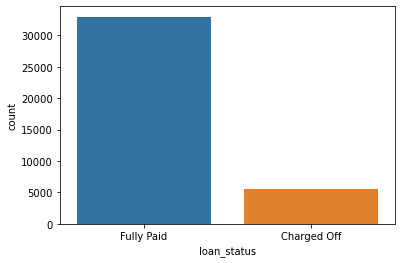

In [47]:
## example of Univariate chart where-in Loan Status is compared on count ## 
## In the below bar chart we find that most of the loan applicants in the data set available have fully paid the loans ##
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(inp0['loan_status'])
plt.show()

In [ ]:
sns.countplot(inp0['loan_status'])
plt.show()

In [51]:
inp0 = inp0[~(inp0.home_ownership.isnull())]

C:\Users\drawat01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


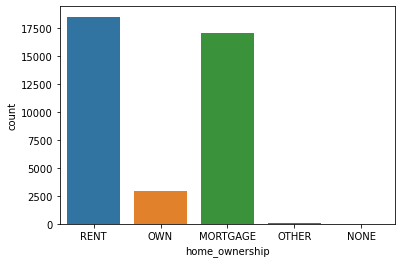

In [52]:
## example of Univariate chart where-in Home Ownership is compared on count ## 
## In the below bar chart we find that most of the loan applicants in the data set available are either on Rent or have Mortgage along ##
sns.countplot(inp0['home_ownership'])
plt.show()

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, 'All'),
  Text(0.0, 0, 'MORTGAGE'),
  Text(1.0, 0, 'NONE'),
  Text(2.0, 0, 'OTHER'),
  Text(3.0, 0, 'OWN'),
  Text(4.0, 0, 'RENT'),
  Text(5.0, 0, 'All'),
  Text(6.0, 0, '')])

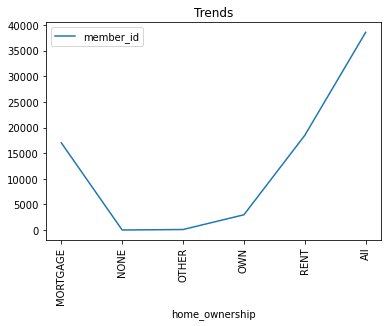

In [53]:
# Biivariate chart --> It shows how many laon applicants / members are there corresponding to individual's home ownership status
# Per chart highest number of loan applicants were on Rent and then followed by ones which already had Mortgage

pltChart = pd.pivot_table(inp0, index = ["home_ownership"], values = ["member_id"], aggfunc='count', margins=True)
pltChart.plot(kind="line", title = "Trends")
plt.xticks(rotation=90)

In [33]:
pd.pivot_table(data=inp0, index = ["loan_status", "home_ownership"]).head()

annual_inc  delinq_2yrs        dti  \
loan_status home_ownership                                         
Charged Off MORTGAGE        75242.507172     0.179201  14.230507   
            OTHER           63433.055556     0.388889  13.128889   
            OWN             53908.049707     0.212190  13.793521   
            RENT            53246.224315     0.155689  13.850042   
Current     MORTGAGE        85675.504765     0.155172  14.702806   

                             funded_amnt  funded_amnt_inv  installment  \
loan_status home_ownership                                               
Charged Off MORTGAGE        13587.236786     12534.848099   380.054018   
            OTHER           13326.388889      9546.124229   444.305556   
            OWN             10761.455982      9950.402801   307.466953   
            RENT            10395.095104      9646.428774   304.003417   
Current     MORTGAGE        17878.056426     17669.228223   426.192100   

                               loan_amnt     member_id  pub_rec_bankruptcies  \
loan_status home_ownership                                                     
Charged Off MORTGAGE        14095.186936  8.708351e+05              0.078474   
            OTHER           13747.222222  4.376609e+05              0.111111   
            OWN             11015.293454  8.697755e+05              0.069767   
            RENT            10632.141599  8.676363e+05              0.057194   
Current     MORTGAGE        18588.714734  1.123146e+06              0.036050   

                               revol_bal  
loan_status home_ownership                
Charged Off MORTGAGE        17732.732273  
            OTHER           14667.500000  
            OWN             11763.950339  
            RENT            10322.344487  
Current     MORTGAGE        19464.633229

In [34]:
# Bivariate Analysis around count of Members - represents Under Home Ownership Segment bifurcated into loan Status applicable##
pd.pivot_table(inp0, index = ["home_ownership", "loan_status"], values = ["member_id"], aggfunc='count', margins=True)

member_id
home_ownership loan_status           
MORTGAGE       Charged Off       2327
               Current            638
               Fully Paid       14694
NONE           Fully Paid           3
OTHER          Charged Off         18
               Fully Paid          80
OWN            Charged Off        443
               Current             83
               Fully Paid        2532
RENT           Charged Off       2839
               Current            419
               Fully Paid       15641
All                             39717

In [35]:
table = pd.pivot_table(inp0, index = ["home_ownership", "loan_status"], values = ["member_id"], aggfunc='count', margins=True)
type(table)

pandas.core.frame.DataFrame

In [36]:
table.query('loan_status == ["Charged Off", "Fully Paid"]')

member_id
home_ownership loan_status           
MORTGAGE       Charged Off       2327
               Fully Paid       14694
NONE           Fully Paid           3
OTHER          Charged Off         18
               Fully Paid          80
OWN            Charged Off        443
               Fully Paid        2532
RENT           Charged Off       2839
               Fully Paid       15641

<AxesSubplot:title={'center':'Loan Applicants Trends'}, xlabel='home_ownership,loan_status'>

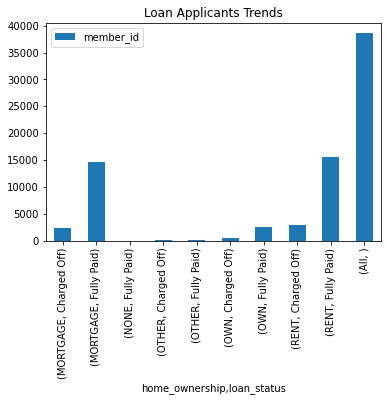

In [55]:
#In the below chart we can easily find that maximum number of Loan Applicants with Home Ownership as "Mortgage" or "Rent" have Fully Paid the loan.
# Just after that if we look for Charged Off Loans the numbers are from the members who are on either on Rent or have a Mortgage.
pltChart = pd.pivot_table(inp0, index = ["home_ownership", "loan_status"], values = ["member_id"], aggfunc='count', margins=True)
pltChart.plot(kind="bar", title = "Loan Applicants Trends")

<AxesSubplot:title={'center':'Loan Applicants Verification'}, xlabel='loan_status,verification_status'>

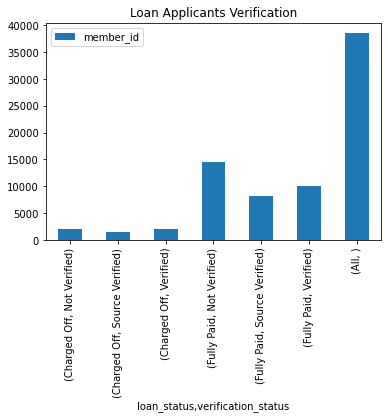

In [56]:
#In the below chart we can easily find that maximum number of Loan Applicants were not verified properly. Even thought the number of members under non verified ones have fully paid however, the compliance is not followed properly which may lead to future risks.
# We also see that there are good number of Non Verified applicants/members which have been charged off too. Also, if there is a good number of members who were verfied and even then, we had few loans charged off. So there, data need to be looked in more detail that what circumstance were observed.
pltChart = pd.pivot_table(inp0, index = ["loan_status", "verification_status"], values = ["member_id"], aggfunc='count', margins=True)
pltChart.plot(kind="bar", title = "Loan Applicants Verification")


In [ ]:
## Conclusion ##
# From the data analysis done so far, its found that there is around 1/6th of the total number of members
# (of data set considered) have been charged off and mostly they were on Rent or had Mortgage and were Not Verified.
# A lot of non - compliance count was found related to loan applicant’s verification process.
